# Importing Required Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Loading Dataset

In [2]:
df=pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv', )

# Displaying top-5 datapoints of dataset

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Splitting Training and Test Data

In [4]:
x_train, x_test, y_train, y_test=train_test_split(df.iloc[:,:-1], df['Prediction'],test_size=0.15, stratify=df['Prediction'])

# Dropping output feature from input features

In [5]:
x_train.drop(['Email No.'],axis=1, inplace=True)
x_test.drop(['Email No.'],axis=1, inplace=True)

# Creating Decision Tree model

In [6]:
# Instantiating Decision tree model
model=DecisionTreeClassifier()

## Defining parameters for Hyper-parameter tuning

In [7]:
params={'criterion':["gini", "entropy", "log_loss"], 
       'splitter':['best','random'], 'max_depth':[11,12]}

grid_cv=GridSearchCV(model, param_grid=params, scoring='accuracy', cv=10)

In [8]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [11, 12],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [9]:
# Getting best parameters
grid_cv.best_params_

{'criterion': 'gini', 'max_depth': 12, 'splitter': 'best'}

## Visualizing Decision Tree

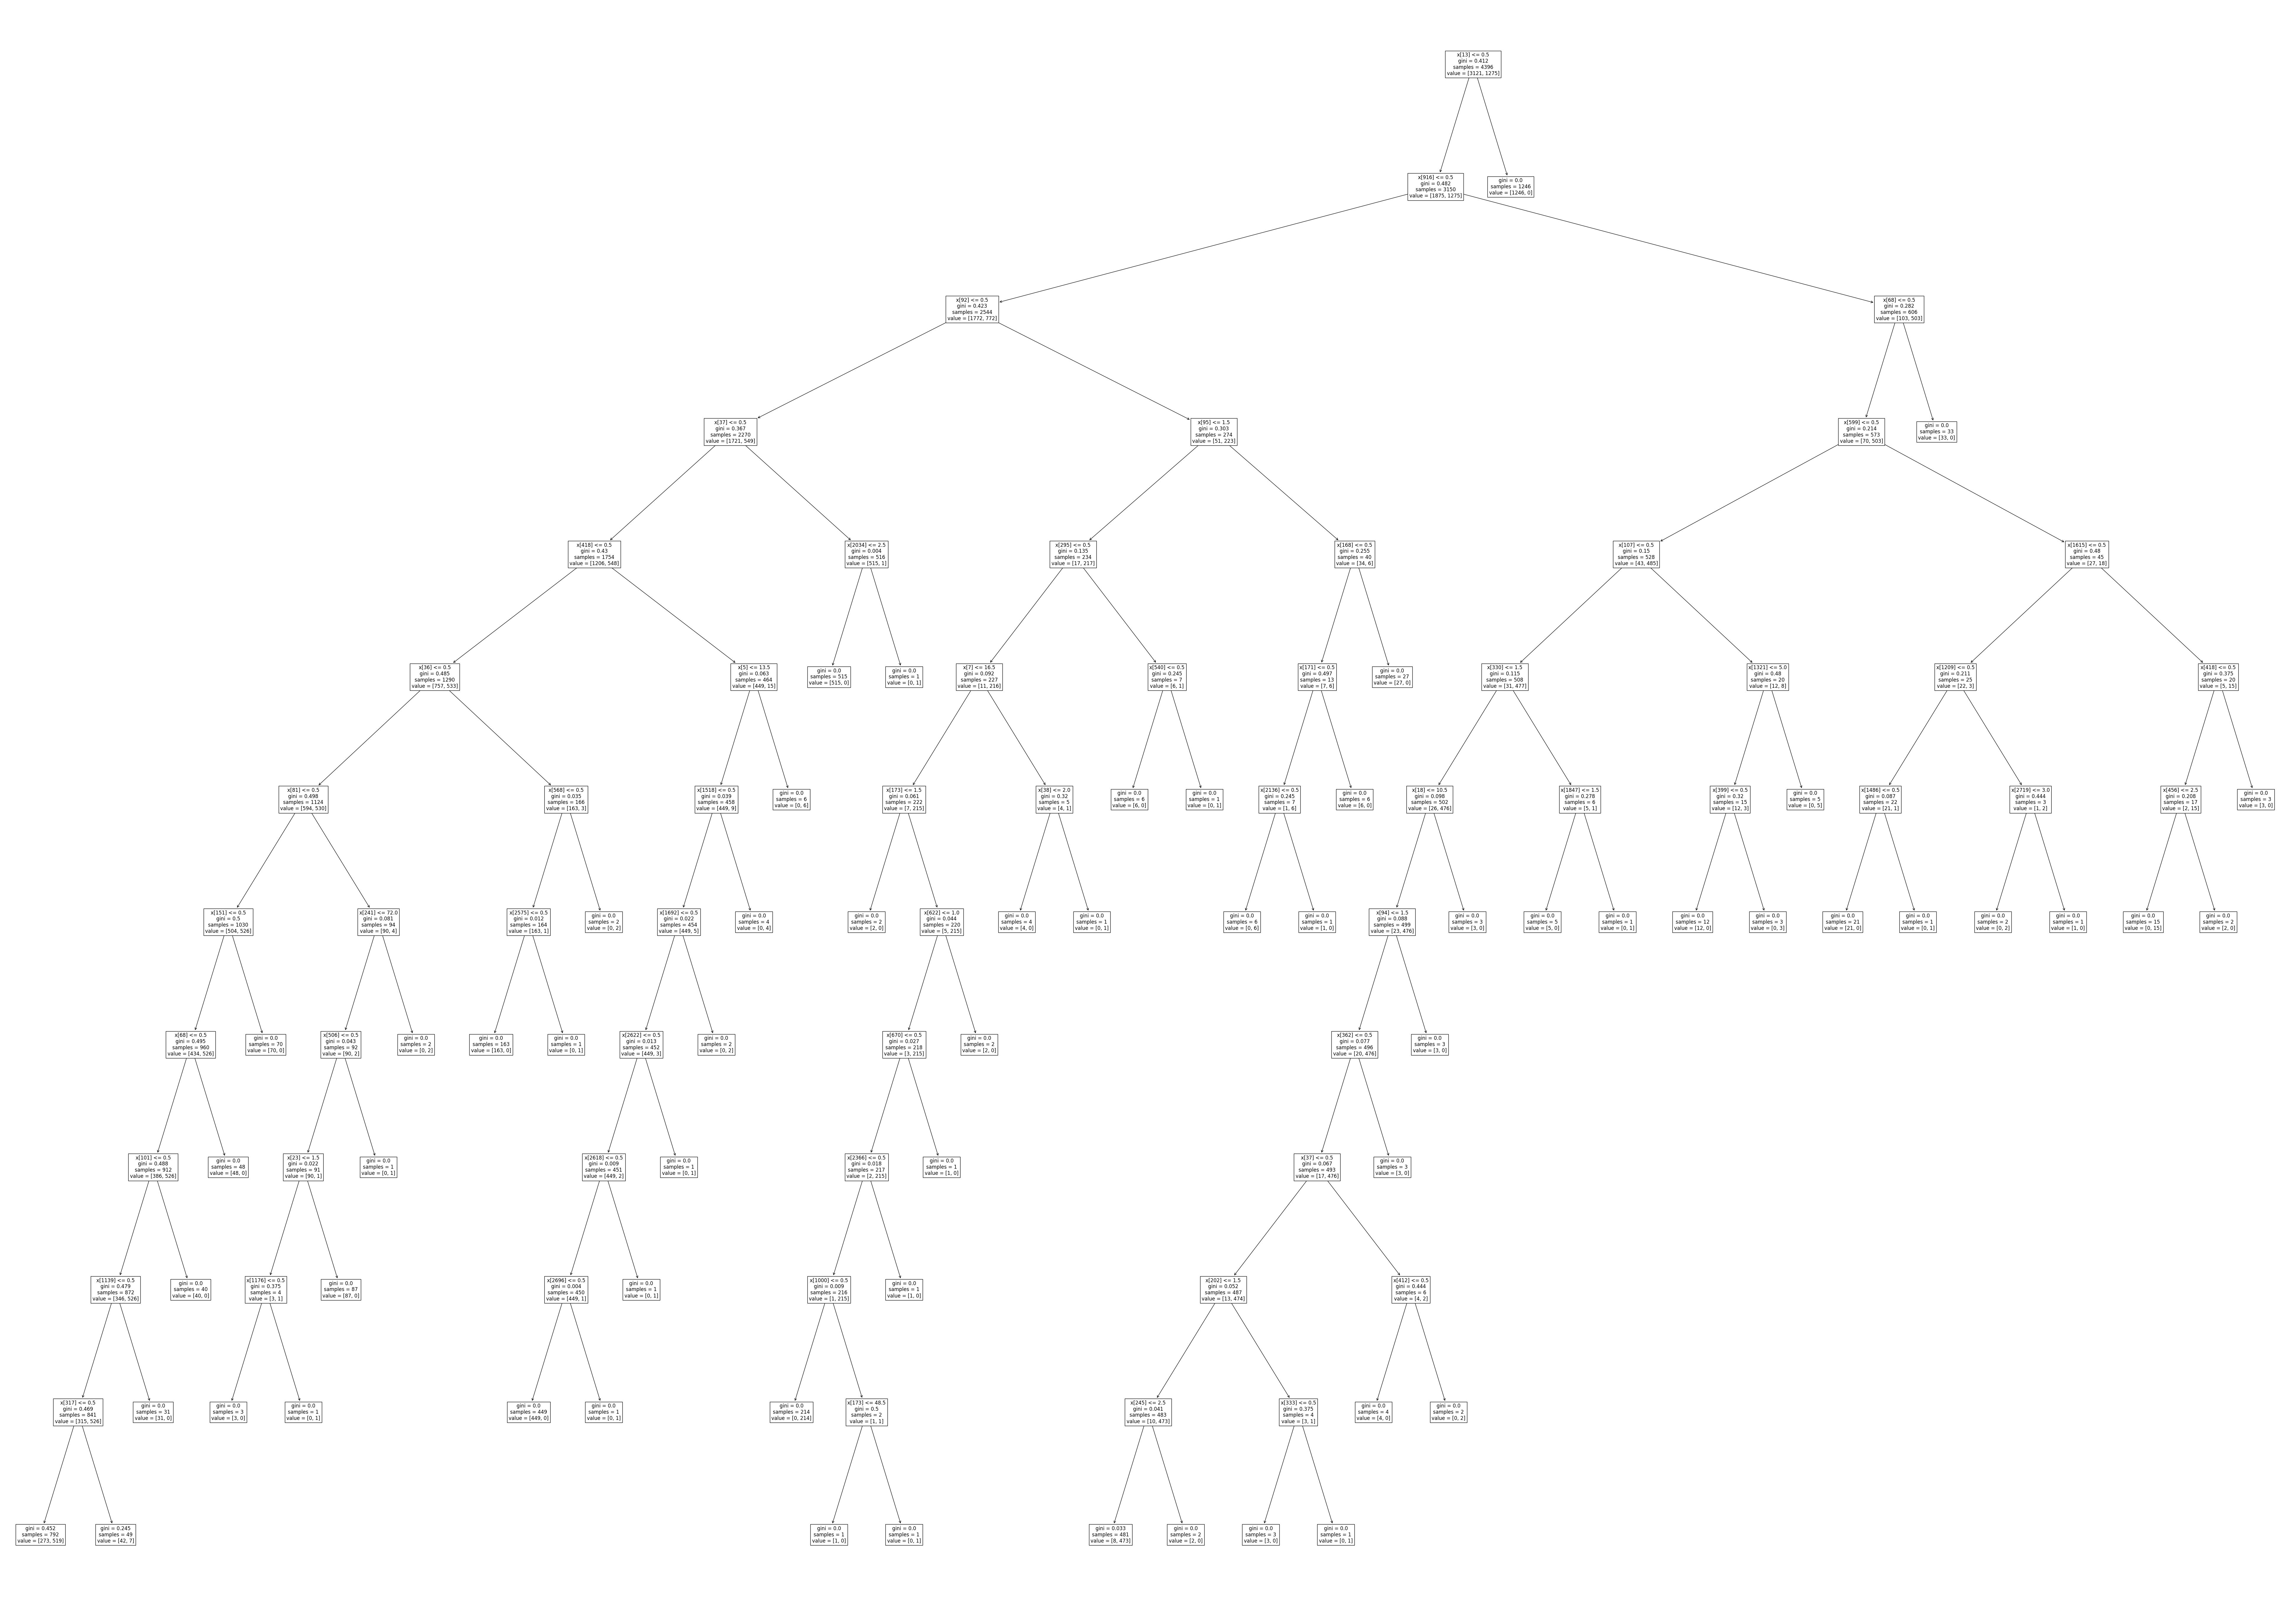

In [10]:
plt.figure(figsize=(100,70))
plot_tree(grid_cv.best_estimator_,max_depth=12, fontsize=12)
plt.show()

## Analyzing Model Performance

In [11]:
pred=grid_cv.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       551
           1       0.81      0.92      0.86       225

    accuracy                           0.91       776
   macro avg       0.89      0.92      0.90       776
weighted avg       0.92      0.91      0.92       776



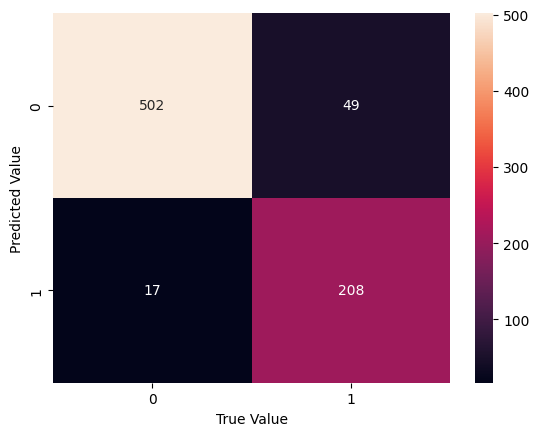

In [14]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True, fmt='.6g')
plt.xlabel('True Value')
plt.ylabel("Predicted Value")
plt.show()

## ROC-AUC Curve

In [15]:
pred_prob=grid_cv.predict_proba(x_test)

In [24]:
fpr, tpr, thresholds=roc_curve(y_test, np.argmax(pred_prob,axis=1))
roc_auc=auc(fpr,tpr)

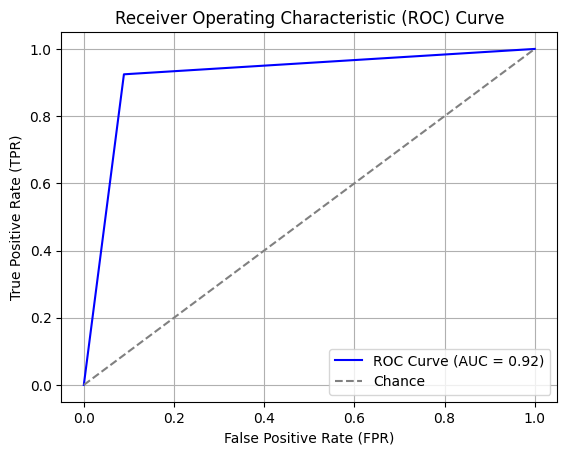

In [27]:
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [30]:
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9177576124218593
